<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 4 - February 13, Thursday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

Problem 2.5 on page 56 of the Computation Statistics book.
Required output to be embedded within the submitted Jupyter Notebook:
All the output corresponding to a specific question must begin in a Markdown Cell with a
heading, for example,

2.5. There were 46 crude oil spills of at least 1000 barrels from tankers in U.S. waters during
1974–1999. The website for this book contains the following data: the number of spills
in the ith year, Ni; the estimated amount of oil shipped through US waters as part of
US import/export operations in the ith year, adjusted for spillage in international or
foreign waters, bi1; and the amount of oil shipped through U.S. waters during domestic
shipments in the ith year, bi2. The data are adapted from [11]. Oil shipment amounts
are measured in billions of barrels (Bbbl).
The volume of oil shipped is a measure of exposure to spill risk. Suppose
we use the Poisson process assumption given by Ni|bi1, bi2 ∼ Poisson(λi) where
λi = α1bi1 + α2bi2. The parameters of this model areα1 and α2, which represent the rate
of spill occurrence per Bbbl oil shipped during import/export and domestic shipments,
respectively.


**a.** Derive the Newton–Raphson update for finding the MLEs of α1 and α2.
(a) Present your derivation using Markdown in Jupyter notebook.
### Answer to part (a):

Given a bivariate Poisson distribution:

\begin{equation*}
f(x) = \frac{{{\lambda}_i}^{x_i}}{x_i!}\exp(-\lambda_i) 
\end{equation*}

The likelihood is defiend as,

\begin{equation*}
L(\lambda) = \prod_{i=1}^{n} \frac{{{\lambda}_i}^{x_i}}{x_i!}\exp(-\lambda_i)  
\end{equation*}

and the loglikelihood computed as,

\begin{equation*}
l(\lambda) = \log(L(\lambda)) = \prod_{i=1}^{n} \left(\log({{\lambda}_i}^{x_i}) - \log(x_i!) - \lambda_i \right) = \left(x_1\log(\lambda_1) + x_2\log(\lambda_2) + ... + x_n\log(\lambda_n) \right) - \sum_{i = 1}^{n} \log(x_i!) - \sum_{i = 1}^{n} \lambda_i 
\end{equation*}

\begin{equation*}
l(\lambda)=\sum_{i = 1}^{n} x_i\log(\lambda_i) - \sum_{i = 1}^{n} \log(x_i!) - \sum_{i = 1}^{n} \lambda_i
\end{equation*}

where the parameter of Poisson distribution ($\lambda$) is defined as,

\begin{equation*}
\lambda_i = \alpha_1\beta_{i1} + \alpha_2\beta_{i2} 
\end{equation*}


placing this into the loglikelihood equation we get:

\begin{equation*}
l(\lambda)=\sum_{i = 1}^{n} x_i\log(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} ) - \sum_{i = 1}^{n} \log(x_i!) - \sum_{i = 1}^{n} \alpha_1\beta_{i1} + \alpha_2\beta_{i2} 
\end{equation*}

with first derivitive being:

\begin{equation*}
l'_{\alpha_1}(\lambda_i)=\sum_{i = 1}^{n} \frac{\beta_{i1}}{\alpha_1\beta_{i1} + \alpha_2\beta_{i2}} x_i - \sum_{i = 1}^{n} \beta_{i1}
\end{equation*} 

and

\begin{equation*}
l'_{\alpha_2}(\lambda_i)=\sum_{i = 1}^{n} \frac{\beta_{i2}}{\alpha_1\beta_{i1} + \alpha_2\beta_{i2}} x_i - \sum_{i = 1}^{n} \beta_{i2}
\end{equation*} 

resulting the following column vector

\begin{equation*}
l'(\lambda_i)=\begin{pmatrix} {\sum_{i = 1}^{n} \frac{\beta_{i1}}{\alpha_1\beta_{i1} + \alpha_2\beta_{i2}} x_i - \sum_{i = 1}^{n} \beta_{i1}} \\ {\sum_{i = 1}^{n} \frac{\beta_{i2}}{\alpha_1\beta_{i1} + \alpha_2\beta_{i2}} x_i - \sum_{i = 1}^{n} \beta_{i2}} \end{pmatrix} 
\end{equation*} 

the seccond derivative is:

\begin{equation*}
\frac{\sigma^2 l}{\sigma\alpha_2\alpha_1} = \frac{\sigma^2 l}{\sigma\alpha_1\alpha_2} =\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i 
\end{equation*} 

\begin{equation*}
\frac{\sigma^2 l}{\sigma{\alpha_1}^2} = \sum_{i = 1}^{n} \frac{-{\beta_{i1}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i 
\end{equation*} 

\begin{equation*}
\frac{\sigma^2 l}{\sigma{\alpha_2}^2} = \sum_{i = 1}^{n} \frac{-{\beta_{i2}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i 
\end{equation*} 

which these form the hessian,

\begin{equation*}
Hessian = 
\begin{pmatrix} {\sum_{i = 1}^{n} \frac{-{\beta_{i1}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i}  & {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i } \\ {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i} & {\sum_{i = 1}^{n} \frac{-{\beta_{i2}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i} \end{pmatrix}
\end{equation*} 

This provides the update:

\begin{equation*}
\lambda^{(t+1)} = \lambda^t - Hessian^{-1}l'(\lambda_i)
\end{equation*}

**b.** Derive the Fisher scoring update for finding the MLEs of α1 and α2.
(b) Present your derivation using Markdown in Jupyter notebook.
### Answer to part (b):

The fisher information can be approximated by the the nagative of the hessian as shown below:

\begin{equation*}
I = -E(Hessian) =  
-E\begin{pmatrix} {\sum_{i = 1}^{n} \frac{-{\beta_{i1}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i}  & {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i } \\ {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i} & {\sum_{i = 1}^{n} \frac{-{\beta_{i2}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} x_i} \end{pmatrix}
\end{equation*} 

where we can assume that the left part of the equation is a constant and the varaible is x then we can write the derivative as shown below. Also form poisson distribution we know that the expexted value of a varible is poisson distribution parameter ($\lambda$).

\begin{equation*}
E \left(\sum_{i = 1}^{n} -x_i\times Constant_i \right) = - E\left(x_1\times Constant_1 +  x_2\times Constant_2 + ... +  x_n\times Constant_n \right) = - \left(E(x_1\times Constant_1) +  E(x_2\times Constant_2) + ... +  E(x_n\times Constant_n) \right) = - \left(\lambda_1\times Constant_1 +  \lambda_2\times Constant_2 + ... +  \lambda_n\times Constant_n \right) = -\sum_{i = 1}^{n} \lambda_i\times Constant_i  
\end{equation*}

where the parameter of Poisson distribution ($\lambda$) is defined as,

\begin{equation*}
\lambda_i = \alpha_1\beta_{i1} + \alpha_2\beta_{i2} 
\end{equation*}


using the above equation we can write:

\begin{equation*}
I = -E(Hessian) =  
-E\begin{pmatrix} {\sum_{i = 1}^{n} \frac{-{\beta_{i1}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} \times \left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right) }  & {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} \times \left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right) } \\ {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} \times \left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)} & {\sum_{i = 1}^{n} \frac{-{\beta_{i2}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)^2} \times \left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)} \end{pmatrix} = -\begin{pmatrix} {\sum_{i = 1}^{n} \frac{-{\beta_{i1}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)}}  & {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)}} \\ {\sum_{i = 1}^{n} \frac{-\beta_{i1}\beta_{i2}}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)}} & {\sum_{i = 1}^{n} \frac{-{\beta_{i2}}^2}{\left(\alpha_1\beta_{i1} + \alpha_2\beta_{i2} \right)}} \end{pmatrix} 
\end{equation*} 

as a result the updating equation is therefore,

\begin{equation*}
\lambda^{(t+1)} = \lambda^t + I( \lambda^t)^{-1}l'(\lambda_i)
\end{equation*}

**c.** Implement the Newton–Raphson and Fisher scoring methods for this problem,
provide the MLEs, and compare the implementation ease and performance of the
two methods.
(c) Present your estimates in the last 5 iterations in a format similar to Table 2.1.

### Answer to part (c):

To see the data in table format install tabulate first:

In [1]:
#pip install tabulate

In [2]:
import time
import numpy as np
import seaborn as sb
import sympy as sym
from sympy import *
from numpy import ma
from numpy.linalg import inv
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
import pymc3
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.stats import *
from matplotlib.patches import Polygon
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function
import sympy as sym
np.random.seed(1000)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


**Load the data**

In [3]:
data = pd.read_table("oilspills.dat", sep="\s+")
data.head()

,year,spills,importexport,domestic
0,1974,2,0.720,0.22
1,1975,5,0.850,0.17
2,1976,3,1.120,0.15
3,1977,3,1.345,0.20
4,1978,1,1.290,0.59


In [4]:
x = data['spills']
beta1 = data['importexport']
beta2 = data['domestic']

**Implement the Newton–Raphson**

In [5]:
# calculte the first and seccond derivative
xt1 = sym.Symbol('a1pha1')
xt2 = sym.Symbol('a1pha2')
Df1 = lambdify([xt1,xt2], sum(x*beta1/(xt1*beta1+xt2*beta2))-sum(beta1), 'numpy')
Df2 = lambdify([xt1,xt2], sum(x*beta2/(xt1*beta1+xt2*beta2))-sum(beta2), 'numpy')
DDf12 = lambdify([xt1,xt2], sum(-x*beta1*beta2/(xt1*beta1+xt2*beta2)**2), 'numpy')
DDf11 = lambdify([xt1,xt2], sum(-x*beta1**2/(xt1*beta1+xt2*beta2)**2), 'numpy')
DDf22 = lambdify([xt1,xt2], sum(-x*beta2**2/(xt1*beta1+xt2*beta2)**2), 'numpy')


def loglikFunc(): 
    Ttot = 1 
    xt1 = sym.Symbol('a1pha1')
    xt2 = sym.Symbol('a1pha2')
    for j in range(len(x)):
        Ttot *= (xt1*beta1[j]+xt2*beta2[j])**x[j]*exp(-(xt1*beta1[j]+xt2*beta2[j]))/np.math.factorial(x[j])   
    return log(Ttot) 
LLfunc = lambdify([xt1,xt2], loglikFunc(), 'numpy')


def NR(Start1, Start2, maxitt):

    itt = 0
    i = 0
    eps = 0.001
    xt1 = Start1
    xt2 = Start2
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2
        
        [[xt1],[xt2]] = [[xt1],[xt2]] - np.linalg.inv([[DDf11(xt1,xt2),DDf12(xt1,xt2)],[DDf12(xt1,xt2),DDf22(xt1,xt2)]]).dot([[Df1(xt1,xt2)],[Df2(xt1,xt2)]])
        
        Hessian = [[DDf11(xt1,xt2),DDf12(xt1,xt2)],[DDf12(xt1,xt2),DDf22(xt1,xt2)]]

        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        print(tabulate([[i, np.array([[xt1],[xt2]]), np.array(Hessian)]], headers=['Iteration Number', 'Alpha1 & Alpha2','Hessian'], tablefmt='orgtbl'))
        
        itt = itt + 1
        
        error_criterion1 = np.absolute(xt1 - xt01)
        error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters

In [6]:
Newton = np.array(NR(1.1,0.6,5)[2])

|   Iteration Number | Alpha1 & Alpha2   | Hessian                       |
|--------------------+-------------------+-------------------------------|
|                  0 | [[1.11069413]     | [[-17.09980762  -9.55305121]  |
|                    |  [0.86509595]]    |  [ -9.55305121  -8.74774852]] |
|   Iteration Number | Alpha1 & Alpha2   | Hessian                       |
|--------------------+-------------------+-------------------------------|
|                  1 | [[1.09777485]     | [[-16.67192442  -9.11306399]  |
|                    |  [0.9350086 ]]    |  [ -9.11306399  -8.23649062]] |
|   Iteration Number | Alpha1 & Alpha2   | Hessian                       |
|--------------------+-------------------+-------------------------------|
|                  2 | [[1.09715323]     | [[-16.66034104  -9.09930215]  |
|                    |  [0.93755179]]    |  [ -9.09930215  -8.2200131 ]] |
|   Iteration Number | Alpha1 & Alpha2   | Hessian                       |
|--------------------+---

**Implement the Newton–Fisherscoring**

In [7]:
# calculte the seccond derivative
xt1 = sym.Symbol('a1pha1')
xt2 = sym.Symbol('a1pha2')
DDfI11 = lambdify([xt1,xt2], sum(beta1**2/(xt1*beta1+xt2*beta2)), 'numpy')
DDfI12 = lambdify([xt1,xt2], sum(beta1*beta2/(xt1*beta1+xt2*beta2)), 'numpy')
DDfI22 = lambdify([xt1,xt2], sum(beta2**2/(xt1*beta1+xt2*beta2)), 'numpy')

def NF(Start1, Start2, maxitt, STD):
    ## STD > print standard error or not
    itt = 0
    i = 0
    eps = 0.001
    xt1 = Start1
    xt2 = Start2
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2

        [[xt1],[xt2]] = [[xt1],[xt2]] + np.linalg.inv([[DDfI11(xt1,xt2),DDfI12(xt1,xt2)],[DDfI12(xt1,xt2),DDfI22(xt1,xt2)]]).dot([[Df1(xt1,xt2)],[Df2(xt1,xt2)]])
        
        Fisher = [[DDfI11(xt1,xt2),DDfI12(xt1,xt2)],[DDfI12(xt1,xt2),DDfI22(xt1,xt2)]]

        Std_error1=inv(Fisher)[0][0]
        Std_error2=inv(Fisher)[1][1]
        
        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        if STD == 1:
            print(tabulate([[i, np.array([[xt1],[xt2]]), np.array(Fisher), Std_error1, Std_error2]], headers=['Iteration Number', 'Alpha1 & Alpha2','Fisher','standard error alpha_1', 'standard error alpha_2'], tablefmt='orgtbl'))
        else:
            print(tabulate([[i, np.array([[xt1],[xt2]]), np.array(Fisher)]], headers=['Iteration Number', 'Alpha1 & Alpha2','Fisher'], tablefmt='orgtbl'))

        itt = itt + 1
        
        error_criterion1 = np.absolute(xt1 - xt01)
        error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters

In [8]:
Fisher = np.array(NF(1.3,0.9,5,0)[2])

|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |
|--------------------+-------------------+-----------------------------|
|                  0 | [[1.07263246]     | [[16.47556919  9.37480343]  |
|                    |  [0.97471587]]    |  [ 9.37480343  7.8323148 ]] |
|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |
|--------------------+-------------------+-----------------------------|
|                  1 | [[1.10498179]     | [[16.39234967  9.39489636]  |
|                    |  [0.92568898]]    |  [ 9.39489636  7.89553586]] |
|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |
|--------------------+-------------------+-----------------------------|
|                  2 | [[1.09469009]     | [[16.41831592  9.38824897]  |
|                    |  [0.94128653]]    |  [ 9.38824897  7.87515455]] |
|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |
|--------------------+-------------------+---------

**d.** Estimate standard errors for the MLEs of α1 and α2.
(d) Present your estimates in the last 5 iterations in a format similar to Table 2.1.

### Answer to part (d):

In [9]:
NF(1.1,0.9,5,1);

|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |   standard error alpha_1 |   standard error alpha_2 |
|--------------------+-------------------+-----------------------------+--------------------------+--------------------------|
|                  0 | [[1.09180033]     | [[16.42569187  9.38642539]  |                 0.191208 |                 0.399102 |
|                    |  [0.9456661 ]]    |  [ 9.38642539  7.86947711]] |                          |                          |
|   Iteration Number | Alpha1 & Alpha2   | Fisher                      |   standard error alpha_1 |   standard error alpha_2 |
|--------------------+-------------------+-----------------------------+--------------------------+--------------------------|
|                  1 | [[1.09884625]     | [[16.407773    9.39090467]  |                 0.191533 |                 0.398642 |
|                    |  [0.93498767]]    |  [ 9.39090467  7.88335483]] |                          |            

**e.** Apply the method of steepest ascent. Use step-halving backtracking as necessary.
(e) Present your estimates in the last 5 iterations in a format similar to Table 2.1.

### Answer to part (e):

In [10]:
def SA(Start1, Start2, maxitt, step):
    ## STD > print standard error or not
    itt = 0
    i = 0
    eps = 0.00001
    xt1 = Start1
    xt2 = Start2
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2

        [[xt1],[xt2]] = [[xt1],[xt2]] + step*inv(-np.eye(2)).dot([[Df1(xt1,xt2)],[Df2(xt1,xt2)]])
        
        step = step/2
        
        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        print(tabulate([[i, np.array([[xt1],[xt2]]), step]], headers=['Iteration Number', 'Alpha1 & Alpha2','step value'], tablefmt='orgtbl'))

        itt = itt + 1
        
        error_criterion1 = np.absolute(xt1 - xt01)
        error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters

In [11]:
SA(1,1.5,5,1);

|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  0 | [[3.85652112]     |          0.5 |
|                    |  [4.49231926]]    |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  1 | [[13.83316936]    |         0.25 |
|                    |  [11.1606064 ]]   |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  2 | [[19.9944055 ]    |        0.125 |
|                    |  [15.22357349]]   |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  3 | [[23.15508945]    |       0.0625 |
|                    |  [17.30740629]]   |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|-------------

In [12]:
def SA_BackTrack(Start1, Start2, maxitt, step):
    ## STD > print standard error or not
    itt = 0
    i = 0
    eps = 0.00001
    xt1 = Start1
    xt2 = Start2
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2

        [[xt1],[xt2]] = [[xt01],[xt02]] - step*inv(-np.eye(2)).dot([[Df1(xt01,xt02)],[Df2(xt01,xt02)]])
        
        while LLfunc(xt1,xt2)<LLfunc(xt01,xt02):
            step = step/2
            [[xt1],[xt2]] = [[xt01],[xt02]] - step*inv(-np.eye(2)).dot([[Df1(xt01,xt02)],[Df2(xt01,xt02)]])
        
        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        print(tabulate([[i, np.array([[xt1],[xt2]]), step]], headers=['Iteration Number', 'Alpha1 & Alpha2','step value'], tablefmt='orgtbl'))

        itt = itt + 1
        
        error_criterion1 = np.absolute(Df1(xt1, xt2))
        error_criterion2 = np.absolute(Df2(xt1, xt2))
        #error_criterion1 = np.absolute(xt1 - xt01)
        #error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters

In [13]:
steepest = np.array(SA_BackTrack(1,0.2,5,1)[2])

|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  0 | [[1.82709757]     |       0.0625 |
|                    |  [0.95576216]]    |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  1 | [[1.30549455]     |       0.0625 |
|                    |  [0.65210367]]    |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  2 | [[1.26283841]     |       0.0625 |
|                    |  [0.68612576]]    |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|--------------------+-------------------+--------------|
|                  3 | [[1.24146585]     |       0.0625 |
|                    |  [0.72598535]]    |              |
|   Iteration Number | Alpha1 & Alpha2   |   step value |
|-------------

**f.** Apply quasi-Newton optimization with the Hessian approximation update given in
(2.49). Compare performance with and without step halving.
(f) Present your estimates in the last 5 iterations in a format similar to Table 2.1. For choices
of the starting matrix M(0), read the 3rd paragraph on page 43.

### Answer to part (f):

In [14]:
def QN(Start1, Start2, maxitt, step):
    ## STD > print standard error or not
    itt = 0
    i = 0
    eps = 0.00001
    xt1 = Start1
    xt2 = Start2
    Matrix = -np.eye(2)
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2

        [[xt1],[xt2]] = [[xt01],[xt02]] - step*inv(Matrix).dot([[Df1(xt01,xt02)],[Df2(xt01,xt02)]])
        
        while LLfunc(xt1,xt2)<LLfunc(xt01,xt02):
            step = step/2
            [[xt1],[xt2]] = [[xt01],[xt02]] - step*inv(Matrix).dot([[Df1(xt01,xt02)],[Df2(xt01,xt02)]])
        
        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        diff = np.array([[xt1 - xt01],[xt2 - xt02]])
        Ddiff = np.array([[Df1(xt1,xt2)-Df1(xt01,xt02)],[Df2(xt1,xt2)-Df2(xt01,xt02)]])
        multi = Ddiff-Matrix.dot(diff)
        Matrix0 = Matrix
        Matrix = Matrix-(Matrix.dot(diff).dot((Matrix.dot(diff)).T))/(diff.T.dot(Matrix).dot(diff))+Ddiff.dot(Ddiff.T)/((diff.T).dot(Ddiff))
        
        if abs(multi.T.dot(diff))<eps:
            Matrix = Matrix0
            
        print(tabulate([[i, np.array([[xt1],[xt2]]), np.array(Matrix)]], headers=['Iteration Number', 'Alpha1 & Alpha2','Matrix'], tablefmt='orgtbl'))

        itt = itt + 1
        
        error_criterion1 = np.absolute(Df1(xt1, xt2))
        error_criterion2 = np.absolute(Df2(xt1, xt2))
        #error_criterion1 = np.absolute(xt1 - xt01)
        #error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters

In [15]:
Quasi = np.array(QN(1,1,5,1)[2])

|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+-------------------+-------------------------------|
|                  0 | [[1.06955143]     | [[-17.17478711  -9.63852883]  |
|                    |  [1.02419857]]    |  [ -9.63852883  -6.69159853]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+-------------------+-------------------------------|
|                  1 | [[1.07574548]     | [[-15.86177964  -8.46867075]  |
|                    |  [1.01111922]]    |  [ -8.46867075  -7.63828355]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+-------------------+-------------------------------|
|                  2 | [[1.07708266]     | [[-15.86177964  -8.46867075]  |
|                    |  [1.00638271]]    |  [ -8.46867075  -7.63828355]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+---

In [16]:
def QN_No_step_halving(Start1, Start2, maxitt, step):
    ## STD > print standard error or not
    itt = 0
    i = 0
    eps = 0.00001
    xt1 = Start1
    xt2 = Start2
    Matrix = -np.eye(2)
    xt_list = []
    et_list = []
    parameters = pd.DataFrame(np.zeros((maxitt + 1, 2)))
    parameters[0][0] = xt1
    parameters[0][1] = xt2
    
    for i in range(10000):
        
        xt01 = xt1
        xt02 = xt2

        [[xt1],[xt2]] = [[xt01],[xt02]] - step*inv(Matrix).dot([[Df1(xt01,xt02)],[Df2(xt01,xt02)]])
        
        parameters.iloc[i+1,0] = xt1
        parameters.iloc[i+1,1] = xt2
        
        diff = np.array([[xt1 - xt01],[xt2 - xt02]])
        Ddiff = np.array([[Df1(xt1,xt2)-Df1(xt01,xt02)],[Df2(xt1,xt2)-Df2(xt01,xt02)]])
        multi = Ddiff-Matrix.dot(diff)
        Matrix0 = Matrix
        Matrix = Matrix-(Matrix.dot(diff).dot((Matrix.dot(diff)).T))/(diff.T.dot(Matrix).dot(diff))+Ddiff.dot(Ddiff.T)/((diff.T).dot(Ddiff))
        
        if abs(multi.T.dot(diff))<eps:
            Matrix = Matrix0
            
        print(tabulate([[i, np.array([[xt1],[xt2]]), np.array(Matrix)]], headers=['Iteration Number', 'Alpha1 & Alpha2','Matrix'], tablefmt='orgtbl'))

        itt = itt + 1
        
        error_criterion1 = np.absolute(Df1(xt1, xt2))
        error_criterion2 = np.absolute(Df2(xt1, xt2))
        #error_criterion1 = np.absolute(xt1 - xt01)
        #error_criterion2 = np.absolute(xt2 - xt02)
        
        xt_list.append([xt01,xt02])
        et_list.append([error_criterion1,error_criterion2])
        if  abs(error_criterion1)<eps and abs(error_criterion2)<eps:
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1)  +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
        elif itt == maxitt:
            print("The maximum number of itterations reached!") 
            print('Solution found based on starting value of ' + str(Start1) +  ' , ' + str(Start2) +  ' : ' + str(xt1) +  ' , ' + str(xt2))
            print('Itteration: ' + str(itt))
            break
    
    return xt1,xt2,parameters


In [17]:
QN_No_step_halving(1,1,5,1);

|   Iteration Number | Alpha1 & Alpha2   | Matrix                      |
|--------------------+-------------------+-----------------------------|
|                  0 | [[2.11282285]     | [[-9.64661561 -5.50718581]  |
|                    |  [1.38717715]]    |  [-5.50718581 -4.44009349]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                      |
|--------------------+-------------------+-----------------------------|
|                  1 | [[1.22465252]     | [[-8.77765823 -5.32776957]  |
|                    |  [0.80855672]]    |  [-5.32776957 -4.57869334]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+-------------------+-------------------------------|
|                  2 | [[0.92076939]     | [[-12.56313331  -5.13788806]  |
|                    |  [1.14486748]]    |  [ -5.13788806  -4.55394616]] |
|   Iteration Number | Alpha1 & Alpha2   | Matrix                        |
|--------------------+-------------------

**comparison of quasi-Newton optimization with and without backtracking update shows that the backtracking can ensure ascent, but guaranteed ascent is not equivalent to guaranteed convergence, therefore we can see with diffrent starting values the quasi-Newton optimization without backtracking update may not necessarly converge! Also, regarding the order of convergence of quasi-Newton methods, they are usually faster than linear but slower than quadratic. Nevertheless, quasi-Newton methods are fast and powerful and are often used frequently.**

**g.** Construct a graph resembling Figure 2.8 that compares the paths taken by methods
used in (a)–(f). Choose the plotting region and starting point to best illustrate the
features of the algorithms’ performance.
(g) Display the required graphs in the notebook.
### Answer to part (g):

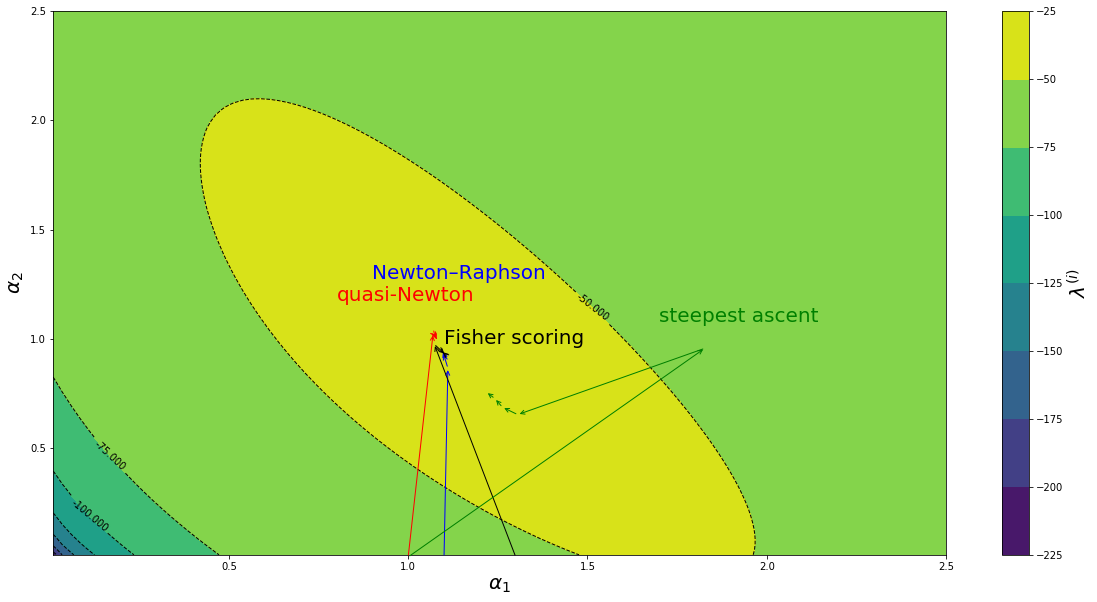

In [18]:
def ll(x,beta1,beta2,Val):
    ll=0
    alpha1=Val[0]
    alpha2=Val[1]
    for i in range(len(x)):
        ll+=x[i]*log(alpha1*beta1[i]+alpha2*beta2[i])-(alpha1*beta1[i]+alpha2*beta2[i])-log(np.math.factorial(x[i]))
    return ll
alpha1 = np.linspace(0.01,2.5,100)
alpha2 = np.linspace(0.01,2.5,100)
Alpha1, Alpha2 = np.meshgrid(alpha1, alpha2)
loglike=np.full_like(Alpha1, np.nan, dtype=float)
for idx in range(Alpha1.size):
    Val = (Alpha1.flat[idx], Alpha2.flat[idx])
    loglike.flat[idx] = ll(x,beta1,beta2,Val)

fig = plt.figure(figsize = (20,10))
cp = plt.contour(Alpha1, Alpha2, loglike, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
for i in range(len(Newton) - 1):
    plt.annotate('', xy=Newton[i + 1, :], xytext=Newton[i, :], arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1}, va='center', ha='center')
for i in range(len(Fisher) - 1):
    plt.annotate('', xy=Fisher[i + 1, :], xytext=Fisher[i, :], arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1}, va='center', ha='center')
for i in range(len(steepest) - 1):
    plt.annotate('', xy=steepest[i + 1, :], xytext=steepest[i, :], arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1}, va='center', ha='center')
for i in range(len(Quasi) - 1):
    plt.annotate('', xy=Quasi[i + 1, :], xytext=Quasi[i, :], arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}, va='center', ha='center')
    
plt.text(0.9, 1.3,  'Newton–Raphson', verticalalignment='center', fontsize=20,color='b')
plt.text(1.1, 1, 'Fisher scoring', verticalalignment='center', fontsize=20,color='k')
plt.text(1.7, 1.1, 'steepest ascent', verticalalignment='center', fontsize=20,color='g')
plt.text(0.8, 1.2, 'quasi-Newton', verticalalignment='center', fontsize=20,color='r')
cp = plt.contourf(Alpha1, Alpha2, loglike, )
bar = plt.colorbar()
bar.set_label(r'$\lambda^{(i)}$', fontsize = 20, rotation = 90)
plt.xlabel(r'$\alpha_1$', fontsize = 20)
plt.ylabel(r'$\alpha_2$', fontsize = 20)
plt.show()

**Fisher scoring method is asymptotically equivalent to Newton’s method and generally, Fisher scoring works better in the beginning to make rapid improvements, while Newton’s method works better for refinement near the end. The method of steepest ascent is obtained with the Hessian replacement M(t) = −I, where I is the identity matrix. therefore, this algorithm involves a positive definite matrix −M(t) to approximate the negative Hessian, and a contraction or step length parameter α(t) > 0 whose value can shrink to ensure ascent at each step. Finally, the quasi-Newton methods are usually faster and more powerful compared to rest.**